In [1]:
# required imports
import jax.numpy as np 
import jax.random as jr
import jax.scipy as jsp
from jax import vmap

import zodiax as zdx 
import optax

import dLux as dl 
import dLux.utils as dlu
import dLux.layers as dll

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [33]:
# Establishing light source
wvl = 2e-7
wf_pix = 512
diameter = 1

lightWave = dl.Wavefront(wavelength=wvl, npixels=wf_pix, diameter=diameter)


Optic(opd=None, phase=None, transmission=f32[512,512], normalise=True)
<class 'jaxlib.xla_extension.ArrayImpl'>


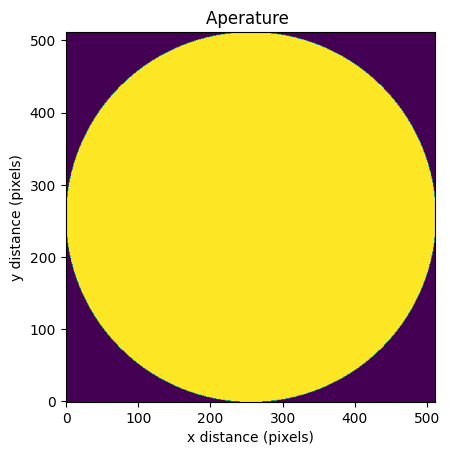

In [ ]:
# Establishing light source
coords = dlu.pixel_coords(wf_pix, diameter)
aperature = dlu.circle(coords, 0.5*diameter)

# Creating the first lens

lens1 = dll.Optic(transmission = aperature, normalise = True)
print(lens1)
plt.imshow(lens1.transmission, origin='lower')
plt.title("Aperature ")
plt.xlabel("x distance (pixels)")
plt.ylabel("y distance (pixels)")
print(type(lens1.transmission))

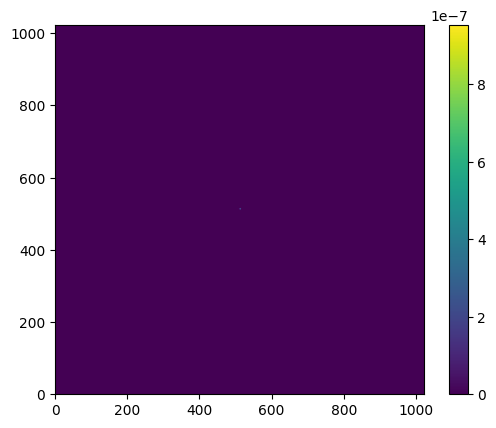

In [58]:
psf_pix = 25
psf_pixel_scale = 50e-3
focal_length = 10
focal_shift = 0

lensApp = lens1.apply(lightWave)
propVal = lensApp.propagate_fresnel(npixels=psf_pix, pixel_scale=psf_pixel_scale, focal_length=focal_length).normalise()
#propVal = lensApp.propagate(npixels=512, pixel_scale=psf_pixel_scale)
propVal = lightWave.propagate_FFT(focal_length=focal_length)

plt.imshow(propVal.psf, origin='lower')
plt.colorbar()

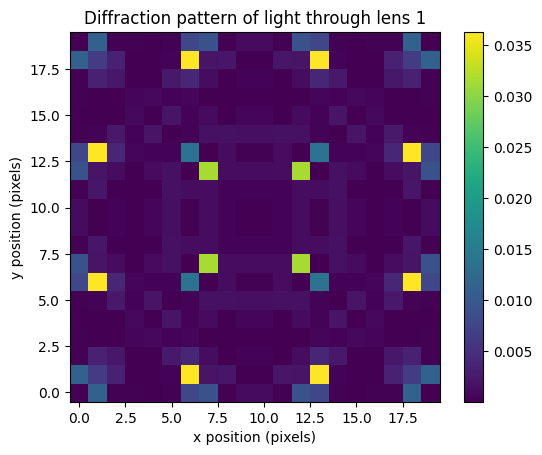

In [62]:
psf_pix = 20
psf_pixel_scale = 50e-3
focal_length = 10
focal_shift = 0

prop = dll.FarFieldFresnel(npixels=psf_pix, pixel_scale=psf_pixel_scale, focal_length=focal_length, focal_shift=focal_shift)
u1 = prop.apply(lensApp).normalise()
plt.imshow(u1.psf, origin = 'lower')
plt.title("Diffraction pattern of light through lens 1")
plt.xlabel("x position (pixels)")
plt.ylabel("y position (pixels)")
plt.colorbar()